# Fehlerbetrachtung

In [2]:
import numpy as np
np.set_printoptions(precision=2, linewidth=65)

import matplotlib.pyplot as plt
plt.rc('figure', dpi=150)

import seaborn as sns
sns.set()
sns.set_style('ticks')
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.2})

import scipy

In diesem Abschnitt werden die Approximationsfehler, d.h. Fehler aus der Differenzenformeln, und Rundungsfehler, d.h. Fehler durch die endliche Genauigkeit der digitalen Darstellung von Zahlen, betrachtet.

## Approximationsfehler

Die Ordnung des Verfahrens kann durch die Betrachtung des Fehlers, hier zum bekannten exakten Wert, bestimmt werden. Dazu wird die Schrittweite kontinuierlich verkleinert. 

In [3]:
def fkt(x):
    return np.sin(3*x) + 2*x

# Daten für die Visualisierung
x = np.linspace(0, 2, 100)
y = fkt(x)

# Exakte Lösung bei x=1
fp_exakt = 3*np.cos(3*0.85) + 2

In [7]:
x0 = 0.85

hs = []
fpfs = []
fpcs = []


h0 = 1
for i in range(18):
    h = h0 / 2**i

    f0 = fkt(x0)
    fnh = fkt(x0 - h)
    fph = fkt(x0 + h)

    fpf = (fph - f0) / h
    fpc = (fph - fnh) / (2*h)
    
    hs.append(h)
    fpfs.append(fpf)
    fpcs.append(fpc)

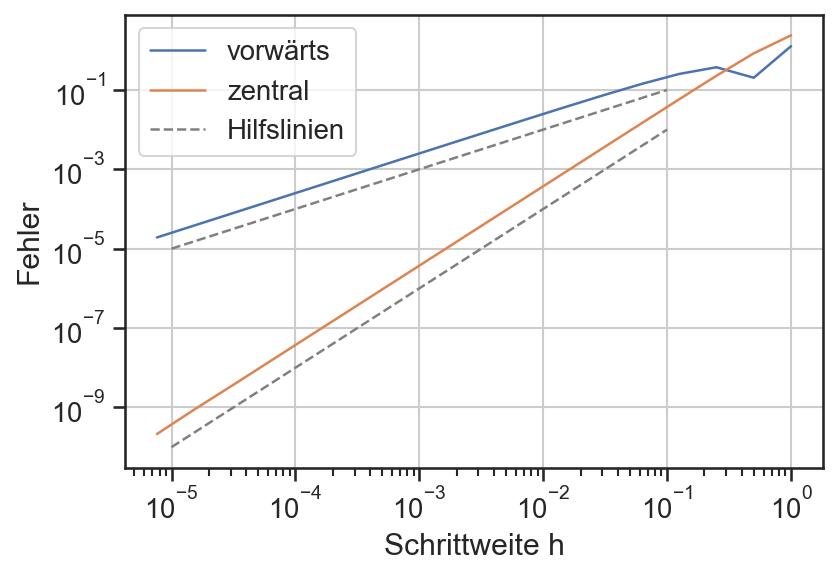

In [8]:
plt.plot(hs, np.abs(fpfs - fp_exakt), label='vorwärts')
plt.plot(hs, np.abs(fpcs - fp_exakt), label='zentral')

plt.plot([1e-5, 1e-1], [1e-5, 1e-1], '--', color='grey', label='Hilfslinien')
plt.plot([1e-5, 1e-1], [1e-10, 1e-2], '--', color='grey')

plt.xlabel('Schrittweite h')
plt.ylabel('Fehler')

plt.xscale('log')
plt.yscale('log')

plt.legend()
plt.grid();

In der logiarithmischen Darstellung beider Achsen werden Potenzfunktionen zu Graden mit dem Potenzgrad als Steigung. Das bedeutet, dass der Fehler im obigen Plot sich wie eine Potenzfunktion mit dem Grad eins bzw. zwei verhält. Die eingezeichneten Hilfslinien haben eine Steigung von eins bzw. zwei. Dies entspricht auch der Ordnung $\sf \mathcal{O}(h)$ bzw. $\sf \mathcal{O}(h^2)$ aus der Differenzenformel.

## Rundungsfehler

Wird nun die Schrittweiter noch weiter verkleinert, wirkt sich die Genauigkeit der Darstellung von Zahlen bzw. Rundungsfehler auf die Approximation aus.

In [11]:
x0 = 0.85

hs = []
fpfs = []
fpcs = []


h0 = 1
for i in range(35):
    h = h0 / 2**i

    f0 = fkt(x0)
    fnh = fkt(x0 - h)
    fph = fkt(x0 + h)

    fpf = (fph - f0) / h
    fpc = (fph - fnh) / (2*h)
    
    hs.append(h)
    fpfs.append(fpf)
    fpcs.append(fpc)

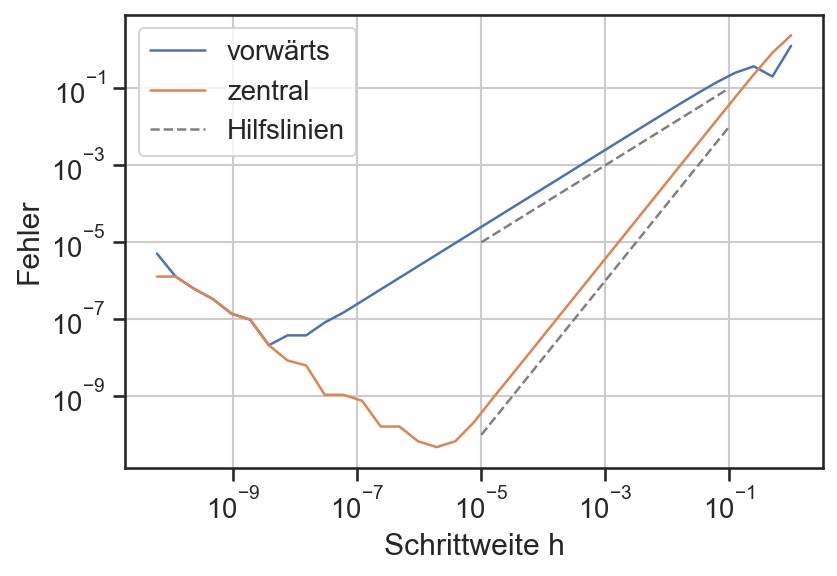

In [12]:
plt.plot(hs, np.abs(fpfs - fp_exakt), label='vorwärts')
plt.plot(hs, np.abs(fpcs - fp_exakt), label='zentral')

plt.plot([1e-5, 1e-1], [1e-5, 1e-1], '--', color='grey', label='Hilfslinien')
plt.plot([1e-5, 1e-1], [1e-10, 1e-2], '--', color='grey')

plt.xlabel('Schrittweite h')
plt.ylabel('Fehler')

plt.xscale('log')
plt.yscale('log')

plt.legend()
plt.grid();

Wie bereits vorgestellt, können 64-Bit-Zahlen nur mit einer Genauigkeit von etwa $\sf \epsilon\approx10^{-16}$ dargestellt werden. Das bedeutet, dass z.B. die Differenz von zwei Zahlen nicht genauer als $\sf \epsilon$ berechnet werden kann. Dies ist der sogenannte Rundungsfehler.

Im konkreten Fall der Vorwärtsdifferenzenformel bedeutet dies:

$$ \sf f'(x_0) = \frac{f(x_0 + h) - f(x_0)}{h} + \mathcal{O}(h) $$
$$\sf \overset{Rundungsfehler}{\Rightarrow} \frac{f(x_0 + h) - f(x_0) + \mathcal{O}(\epsilon)}{h} + \mathcal{O}(h) $$
$$ \sf = \frac{f(x_0 + h) - f(x_0)}{h} + \mathcal{O}\left(\frac{\epsilon}{h}\right) + \mathcal{O}(h) $$

Damit macht eine Verkleinerung von $\sf h$ nur Sinn, solange der Rundungsfehler klein gegenüber $\sf h$ ist. Genauer:
$$\sf \frac{\epsilon}{h} \le h $$
$$\sf \Rightarrow \quad h \ge \sqrt{\epsilon} $$

Mit $\sf \epsilon \approx 10^{-16}$ ist für diese Differenzenformel ein $\sf h$ nur bis etwa $\sf 10^{-8}$ angemessen.
